<a href="https://colab.research.google.com/github/diego1401/CSE303/blob/main/CSE303_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **WEEK 1**

---



## **Part 1**

In [ ]:
import torch

In [ ]:
x = torch.rand((2,5))

#why does he say there is no reshape?
print(x.view((1,10)))
print(x.reshape(1,10))

tensor([[0.5378, 0.1248, 0.0465, 0.0350, 0.1308, 0.3201, 0.5654, 0.0291, 0.4956,
         0.4683]])
tensor([[0.5378, 0.1248, 0.0465, 0.0350, 0.1308, 0.3201, 0.5654, 0.0291, 0.4956,
         0.4683]])


## **Part 2**





In [ ]:

import torchvision
from torchvision import transforms, datasets

In [ ]:
train = datasets.MNIST("",train=True,download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("",train=False,download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
a = [1,2,3,4]
b = torch.utils.data.DataLoader(a)
#we see that torch.utils.data.Dataloader puts the elements of a list into tensors
for i in b:
  print(i)

tensor([1])
tensor([2])
tensor([3])



tensor([4])


In [ ]:
# We are careful to set shuffle to True, avoid ordered data
trainset = torch.utils.data.DataLoader(train, batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10,shuffle=True)

In [ ]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [ ]:
x,y = data[0][0],data[1][0]

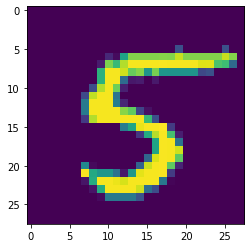

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x.reshape(28,28))
plt.show()

In [ ]:
print(y)

tensor(5)


In [ ]:
#We always want to check for the BALANCE of the dataset
total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
for data in trainset:
  Xs, ys = data
  for y in ys:
    counter_dict[(int(y))] +=1
    total +=1
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:
for i in counter_dict:
  print(f"{i}:{counter_dict[i]/total*100}")

0:9.871666666666666
1:11.236666666666666
2:9.93
3:10.218333333333334
4:9.736666666666666
5:9.035
6:9.863333333333333
7:10.441666666666666
8:9.751666666666667
9:9.915000000000001


## **Part 3**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


In [ ]:
#torch.relu for nn.sequetial it creates a nn.Module

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__() #super inherit methods and attributes of nn.Module

    #layers
    self.fc1 = nn.Linear(28*28, 64) #28*28 bc flatten, 64 is arbitrary
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10) #10 as output as there are 10 classes


  def forward(self, x):
    #We can apply logic to this (if,else,...)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)



    return F.log_softmax(x,dim=1) 

#to get a probabilistic result, dim=1 bc
#we want the classes to sum to 1, not the batches
net = Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
X = torch.rand((28,28)).reshape(1,784) # -1 to specify an unknown size
output = net(X)

In [ ]:
output

tensor([[-2.4620, -2.3681, -2.2167, -2.2719, -2.2247, -2.2513, -2.2332, -2.3686,
         -2.3163, -2.3413]], grad_fn=<LogSoftmaxBackward>)

In [ ]:
print(list(net.parameters()))

[Parameter containing:
tensor([[ 0.0098, -0.0291,  0.0132,  ..., -0.0138, -0.0047,  0.0172],
        [-0.0082,  0.0284,  0.0032,  ..., -0.0342,  0.0083, -0.0173],
        [ 0.0185,  0.0235, -0.0004,  ...,  0.0244, -0.0322, -0.0117],
        ...,
        [-0.0319, -0.0241,  0.0340,  ..., -0.0135, -0.0230, -0.0034],
        [ 0.0145, -0.0063,  0.0337,  ...,  0.0276,  0.0199, -0.0262],
        [ 0.0045, -0.0175, -0.0339,  ...,  0.0195,  0.0319, -0.0300]],
       requires_grad=True), Parameter containing:
tensor([-0.0165, -0.0242,  0.0124, -0.0042,  0.0189, -0.0305, -0.0096,  0.0295,
        -0.0325, -0.0029,  0.0156,  0.0340, -0.0152, -0.0271,  0.0042,  0.0239,
         0.0280,  0.0322, -0.0356,  0.0287, -0.0067,  0.0169,  0.0242, -0.0260,
         0.0156, -0.0064, -0.0257,  0.0021,  0.0104,  0.0126,  0.0070, -0.0142,
         0.0102, -0.0162, -0.0081, -0.0192,  0.0138, -0.0283,  0.0260, -0.0046,
         0.0164, -0.0181,  0.0174, -0.0287, -0.0094, -0.0103, -0.0242, -0.0149,
         0.02

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
  for data in trainset:
    #data here is a bacth
    X,y = data
    net.zero_grad()
    output = net(X.reshape(-1,784))
    loss = F.nll_loss(output,y) #we use nll_loss bc we dont have a one hot vect
    #repr for the targets, for one hot vect use MSE
    #we could do it by hand, i.e SGD
    loss.backward()
    optimizer.step()
  print(loss)

#We mainly use pytorch for reasearch
#Tensorflow for google, apps, also google reasearch
# Caffe and Caffe 2 also exist


tensor(0.0190, grad_fn=<NllLossBackward>)
tensor(0.0221, grad_fn=<NllLossBackward>)
tensor(0.0378, grad_fn=<NllLossBackward>)


In [ ]:
import torch

Accuracy:  0.9775


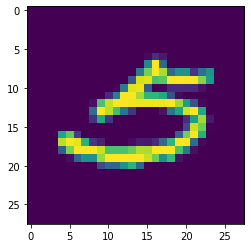

In [ ]:
correct = 0
total = 0

with torch.no_grad(): #we dont wanna calculate gradients
  for data in trainset:
    X,y = data
    output = net(X.reshape(-1,784))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      else:
        plt.imshow(X[idx].reshape(28,28))
        #I dont even know what that is XD
      total +=1

print("Accuracy: ",correct/total)


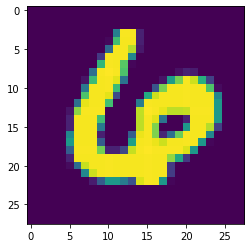

In [ ]:
plt.imshow(X[9].reshape(28,28))
plt.show()

In [ ]:
print(torch.argmax(net(X[9].reshape(-1,784))))

tensor(6)


## Part 5

Convolutional neural networks

In [ ]:
#we use this to be able to access the data in the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
path = '/content/drive/My Drive/Colab Notebooks'
#os.chdir(path)

cwd = os.getcwd()
print(cwd)

print(os.listdir())


/content/drive/My Drive/Colab Notebooks
['catvdog.zip', 'folder', 'training_data.npy', 'MNIST', 'CSE303_week1.ipynb']


In [ ]:
#we used this to unzip the dataset into folder
#!unzip -uq "catvdog.zip" -d "folder"

In [ ]:
import torch
import os
import cv2
import numpy as np
from tqdm import tqdm
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

REBUILD_DATA = False
if torch.cuda.is_available():
  device = torch.device("cuda:0")
  print("running on the GPU")
else:
  device = torch.device("cpu")
  print("running on the CPU")

class DogsVsCats():
  IMG_SIZE = 50
  
  CATS = "folder/PetImages/Cat"
  DOGS = "folder/PetImages/Dog"
  LABELS = {CATS:0, DOGS:1}
  training_data = []
  catcount = 0
  dogcount = 0
  #BALANCE

  def make_training_data(self):
    for label in self.LABELS:
      print(label)
      for f in tqdm(os.listdir(label)):
        if "jpg" in f:
          try:
            path = os.path.join(label,f)
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            #simplify
            img = cv2.resize(img,(self.IMG_SIZE,self.IMG_SIZE))
            self.training_data.append([np.array(img),np.eye(2)[self.LABELS[label]]])

            if label == self.CATS:
              self.catcount += 1
            elif label == self.DOGS:
              self.dogcount += 1
          except Exception as e:
            print(str(e))
            pass
      
      np.random.shuffle(self.training_data)
      np.save("training_data.npy",self.training_data)
      print("Cats:",self.catcount)
      print("Dogs:",self.dogcount)

if REBUILD_DATA:
  dogsvcats = DogsVsCats()
  dogsvcats.make_training_data()

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,32,5)
    self.conv2 = nn.Conv2d(32,64,5)
    self.conv3 = nn.Conv2d(64,128,5)

    x = torch.randn(50,50).reshape(-1,1,50,50)
    #Write computations
    
    self._to_linear = None
    self.convs(x)
    self.fc1 = nn.Linear(self._to_linear,512)
    self.fc2 = nn.Linear(512,2)
  def convs(self,x):
    x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)),(2,2))
    x = F.max_pool2d(F.relu(self.conv3(x)),(2,2))
    if self._to_linear is None:
      self._to_linear = x[0].shape[0] * x[0].shape[1] * x[0].shape[2]
      #print(self._to_linear)
    return x

  def forward(self,x):
    x = self.convs(x)
    x = x.reshape(-1,self._to_linear)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return F.softmax(x, dim=1)

net = Net().to(device)
print(net)

training_data = np.load("training_data.npy",allow_pickle=True)


loss_function = nn.MSELoss()


X = torch.Tensor([i[0] for i in training_data]).reshape(-1,50,50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

VAL_PCT = 0.1
val_size = int(len(X) * VAL_PCT)
print("The size of the validation set is: ",val_size)
#Important to have a validation set
train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

print("the sise of the training set is: ",len(train_X))
print("the size of the test set is: ",len(test_X))

BATCH_SIZE = 100
EPOCHS = 10
def train(net):
  optimizer = optim.Adam(net.parameters(),lr=0.001)
  for epoch in range(EPOCHS):
    for i in tqdm(range(0,len(train_X),BATCH_SIZE)):
      batch_X = train_X[i:i+BATCH_SIZE].reshape(-1,1,50,50)
      batch_y = train_y[i:i+BATCH_SIZE]

      batch_X, batch_y = batch_X.to(device), batch_y.to(device)


      net.zero_grad()
      #as long as the mode.parameters() are controled by the optim, equivalent to 
      #optim.zero_grad()
      outputs = net(batch_X)
      loss = loss_function(outputs, batch_y)
      loss.backward()
      optimizer.step()
    print(f"Epcoch:{epoch}. Loss: {loss}")

def test(net):
  correct = 0
  total = 0
  with torch.no_grad():
    for i in tqdm(range(len(test_X))):
      real_class = torch.argmax(test_y[i]).to(device)
      net_out = net(test_X[i].reshape(-1,1,50,50).to(device))[0]
      predicted_class = torch.argmax(net_out)
      if predicted_class == real_class:
        correct += 1
      total += 1
  print("Accuracy:",correct/total)

train(net)

test(net)

running on the GPU
Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)


  2%|▏         | 4/225 [00:00<00:05, 38.88it/s]

The size of the validation set is:  2494
the sise of the training set is:  22452
the size of the test set is:  2494


  3%|▎         | 6/225 [00:00<00:04, 48.96it/s]

Epcoch:0. Loss: 0.21919061243534088 



  2%|▏         | 5/225 [00:00<00:04, 49.62it/s]

Epcoch:1. Loss: 0.18632951378822327 



  3%|▎         | 6/225 [00:00<00:04, 49.01it/s]

Epcoch:2. Loss: 0.17430394887924194 



  3%|▎         | 6/225 [00:00<00:04, 49.41it/s]

Epcoch:3. Loss: 0.15447698533535004 



  3%|▎         | 6/225 [00:00<00:04, 48.80it/s]

Epcoch:4. Loss: 0.12578962743282318 



  3%|▎         | 6/225 [00:00<00:04, 49.50it/s]

Epcoch:5. Loss: 0.10754093527793884 



  3%|▎         | 6/225 [00:00<00:04, 49.49it/s]

Epcoch:6. Loss: 0.07269924134016037 



  2%|▏         | 5/225 [00:00<00:04, 48.27it/s]

Epcoch:7. Loss: 0.06440949440002441 



  2%|▏         | 5/225 [00:00<00:04, 49.29it/s]

Epcoch:8. Loss: 0.04911869019269943 



  4%|▎         | 91/2494 [00:00<00:02, 900.70it/s]

Epcoch:9. Loss: 0.022562632337212563 



100%|██████████| 2494/2494 [00:02<00:00, 870.03it/s]

Accuracy: 0.7738572574178028


Be careful with notebooks! There can be bugs, caused by cells you ran before

In [ ]:
#this is a cool trick to transform numbers into a 1 hot representation
#np.eye(# of classes)[index of target]

In [ ]:
#Checks that the GPU is running
!nvidia-smi

Tue Oct  6 07:19:17 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    34W / 149W |     11MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
torch.cuda.device_count()

1

The conversion to GPU takes time, to that's why we dont put everything 
GPU

#Part 8

In [ ]:
import torch
import os
import cv2
import numpy as np
from tqdm import tqdm
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

REBUILD_DATA = False

if torch.cuda.is_available():
  device = torch.device("cuda:0")
  print("running on the GPU")
else:
  device = torch.device("cpu")
  print("running on the CPU")

class DogsVsCats():
  IMG_SIZE = 50
  
  CATS = "folder/PetImages/Cat"
  DOGS = "folder/PetImages/Dog"
  LABELS = {CATS:0, DOGS:1}
  training_data = []
  catcount = 0
  dogcount = 0
  #BALANCE

  def make_training_data(self):
    for label in self.LABELS:
      print(label)
      for f in tqdm(os.listdir(label)):
        if "jpg" in f:
          try:
            path = os.path.join(label,f)
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            #simplify
            img = cv2.resize(img,(self.IMG_SIZE,self.IMG_SIZE))
            self.training_data.append([np.array(img),np.eye(2)[self.LABELS[label]]])

            if label == self.CATS:
              self.catcount += 1
            elif label == self.DOGS:
              self.dogcount += 1
          except Exception as e:
            print(str(e))
            pass
      
      np.random.shuffle(self.training_data)
      np.save("training_data.npy",self.training_data)
      print("Cats:",self.catcount)
      print("Dogs:",self.dogcount)

if REBUILD_DATA:
  dogsvcats = DogsVsCats()
  dogsvcats.make_training_data()

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,32,5)
    self.conv2 = nn.Conv2d(32,64,5)
    self.conv3 = nn.Conv2d(64,128,5)

    x = torch.randn(50,50).reshape(-1,1,50,50)
    #Write computations
    
    self._to_linear = None
    self.convs(x)
    self.fc1 = nn.Linear(self._to_linear,512)
    self.fc2 = nn.Linear(512,2)
  def convs(self,x):
    x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)),(2,2))
    x = F.max_pool2d(F.relu(self.conv3(x)),(2,2))
    if self._to_linear is None:
      self._to_linear = x[0].shape[0] * x[0].shape[1] * x[0].shape[2]
      #print(self._to_linear)
    return x

  def forward(self,x):
    x = self.convs(x)
    x = x.reshape(-1,self._to_linear)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return F.softmax(x, dim=1)

net = Net().to(device)
print(net)

training_data = np.load("training_data.npy",allow_pickle=True)

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()


X = torch.Tensor([i[0] for i in training_data]).reshape(-1,50,50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

VAL_PCT = 0.1
val_size = int(len(X) * VAL_PCT)
print("The size of the validation set is: ",val_size)
#Important to have a validation set
train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

print("the sise of the training set is: ",len(train_X))
print("the size of the test set is: ",len(test_X))

BATCH_SIZE = 100
EPOCHS = 10


running on the GPU
Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)
The size of the validation set is:  2494
the sise of the training set is:  22452
the size of the test set is:  2494


In [ ]:
def fwd_pass(X,y,train=False):
  if train:
    net.zero_grad()
  outputs = net(X)
  matches = [torch.argmax(i)==torch.argmax(j) for i, j in zip(outputs,y)]
  acc = matches.count(True)/len(matches)
  loss = loss_function(outputs,y)

  if train:
    loss.backward()
    optimizer.step()
  return acc,loss 

In [ ]:
import numpy as np

In [ ]:
def test(size=32):
  random_start = np.random.randint(len(test_X)-size)
  X,y = test_X[random_start:random_start+size], test_y[random_start:random_start+size]
  with torch.no_grad():
    val_acc,val_loss = fwd_pass(X.reshape(-1,1,50,50).to(device), y.to(device))
  return val_acc, val_loss

val_acc, val_loss = test(size=32)
print(val_acc,val_loss)

0.40625 tensor(0.2517, device='cuda:0')


In [ ]:
import time 

MODEL_NAME = f"model-{int(time.time())}"
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

print(MODEL_NAME)

def train(net):
  BATCH_SIZE = 100
  EPOCHS = 30
  with open("model.log","a") as f:
    for epoch in range(EPOCHS):
      for i in tqdm(range(0,len(train_X),BATCH_SIZE)):
        batch_X = train_X[i:i+BATCH_SIZE].reshape(-1,1,50,50)
        batch_y = train_y[i:i+BATCH_SIZE]

        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        acc, loss = fwd_pass(batch_X, batch_y, train=True)
        if i%50 == 0:
          val_acc, val_loss = test(size=100)
          f.write(f"{MODEL_NAME},{round(time.time(),3)},{round(float(acc),2)},{round(float(loss),4)},{round(float(val_acc),2)},{round(float(val_loss),4)} \n")

      
train(net)



  1%|          | 2/225 [00:00<00:13, 16.15it/s]

model-1601980962


100%|██████████| 225/225 [00:10<00:00, 21.09it/s]
